In [6]:
# import pandas with shortcut 'pd'
import pandas as pd

# read_csv function which is used to read the required CSV file
data = pd.read_csv('old.csv')
print(data)

                                                     url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   0        3           0      0 

In [8]:
data['status'] = data['status'].replace(['legitimate'], '0')
data['status'] = data['status'].replace(['phishing'], '1')
df = pd.DataFrame(data=data)
df = df.drop(["url"], axis=1)
print(df)
print(data)

       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_or  nb_eq  ...  domain_in_title  domain_with_copyright  \

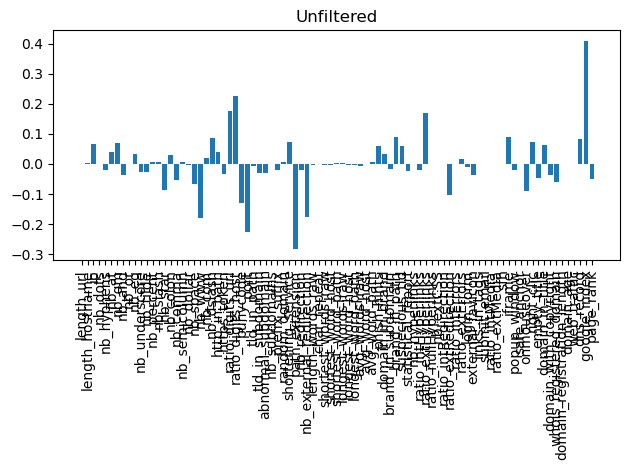

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = data.drop(columns=["status", "url"])
y = data["status"]

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_

plt.bar([df.head(n=1).columns[i] for i in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.title("Unfiltered")
plt.savefig('graph.png')
plt.tight_layout()
plt.show()
    

In [63]:
import numpy as np
from heapq import nlargest

indexes = np.array(importance)
indexes = np.absolute(indexes)
indexes = np.argpartition(indexes, -10)[-10:]
print(indexes)
indexes = indexes.tolist()

[78 51 54 58 36 20 53 25 26 38]


In [64]:
new_data = pd.DataFrame(df.iloc[:, indexes])
new_data["status"] = y
print(new_data)


       domain_in_title  domain_in_brand  suspecious_tld  ratio_extHyperlinks  \
0                    0                0               0             0.470588   
1                    1                0               0             0.033333   
2                    1                0               0             0.000000   
3                    1                0               0             0.026846   
4                    0                0               0             0.529412   
...                ...              ...             ...                  ...   
11425                0                0               0             0.115578   
11426                1                0               0             0.000000   
11427                0                1               0             0.529412   
11428                1                0               0             0.625000   
11429                1                0               0             0.571429   

       path_extension  nb_www  brand_in

       domain_in_title  domain_in_brand  suspecious_tld  ratio_extHyperlinks  \
0                    0                0               0             0.470588   
1                    1                0               0             0.033333   
2                    1                0               0             0.000000   
3                    1                0               0             0.026846   
4                    0                0               0             0.529412   
...                ...              ...             ...                  ...   
11425                0                0               0             0.115578   
11426                1                0               0             0.000000   
11427                0                1               0             0.529412   
11428                1                0               0             0.625000   
11429                1                0               0             0.571429   

       path_extension  nb_www  brand_in

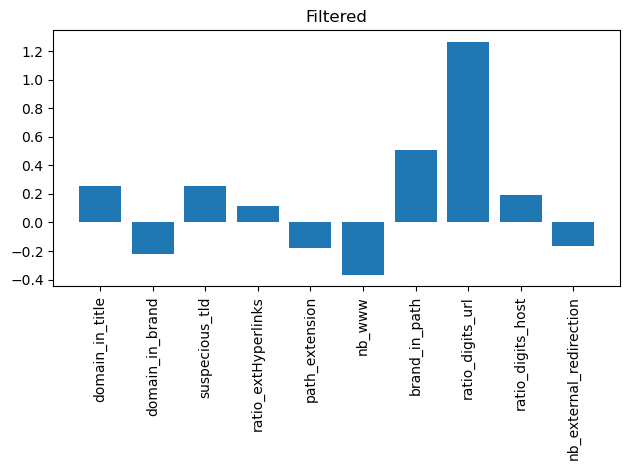

In [65]:
X = new_data.drop(labels="status", axis=1)
y = new_data["status"]
print(X)
model.fit(X, y)
# get importance
importance = model.coef_

plt.cla()
plt.bar([new_data.head(n=1).columns[i] for i in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.title("Filtered")
#plt.savefig('graph.png')
plt.tight_layout()
plt.show()

new_data.to_csv('new.csv')

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

file = pd.read_csv("new.csv", usecols=lambda x: x != 'url')
file.dropna()
X = file.drop(columns=["status"])
y = file["status"]
test_ratio = 5 / 100

train_features, test_features, train_labels, test_answers = train_test_split(X, y, test_size=test_ratio)

knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(train_features, train_labels)

predictions = knn.predict(test_features)

accuracy = accuracy_score(test_answers, predictions)
precision = precision_score(test_answers, predictions, average='weighted')
recall = recall_score(test_answers, predictions, average='weighted')

confusion = confusion_matrix(test_answers, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(confusion)

print(X)

Accuracy: 0.52
precision: 0.52
recall: 0.52
[[148 128]
 [149 147]]
       Unnamed: 0  domain_in_title  domain_in_brand  suspecious_tld  \
0               0                0                0               0   
1               1                1                0               0   
2               2                1                0               0   
3               3                1                0               0   
4               4                0                0               0   
...           ...              ...              ...             ...   
11425       11425                0                0               0   
11426       11426                1                0               0   
11427       11427                0                1               0   
11428       11428                1                0               0   
11429       11429                1                0               0   

       ratio_extHyperlinks  path_extension  nb_www  brand_in_path  \
0          

/home/gurolberkay/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
